In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from tools.masks import Masks

In [2]:
# TODO: add documentation to this method, taken from SAM's notebooks.
# https://github.com/facebookresearch/segment-anything/blob/main/notebooks/predictor_example.ipynb
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels == 1]
    neg_points = coords[labels == 0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white',
               linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white',
               linewidth=1.25)

In [3]:
# TODO: add documentation to this method, taken from SAM's notebooks.
# https://github.com/facebookresearch/segment-anything/blob/main/notebooks/predictor_example.ipynb
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30 / 255, 144 / 255, 255 / 255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

In [4]:
image_number = '001'
slice_number = '98'
# image_number = '001'
# slice_number = '110'
# image_number = '001'
# slice_number = '122'
# image_number = '008'
# slice_number = '26'
data_folder_path = Path('data')
image_slice_path = data_folder_path / Path(f'coronacases_{image_number}_image_slice_{slice_number}.npy')
masks_slice_path = data_folder_path / Path(f'coronacases_{image_number}_masks_slice_{slice_number}.npy')

In [5]:
image_slice = np.load(image_slice_path)
image_slice.shape

(512, 512)

In [6]:
masks_slice = np.load(masks_slice_path)
masks_slice.shape

(512, 512)

In [7]:
masks = Masks(points=masks_slice)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

NameError: name 'masks' is not defined

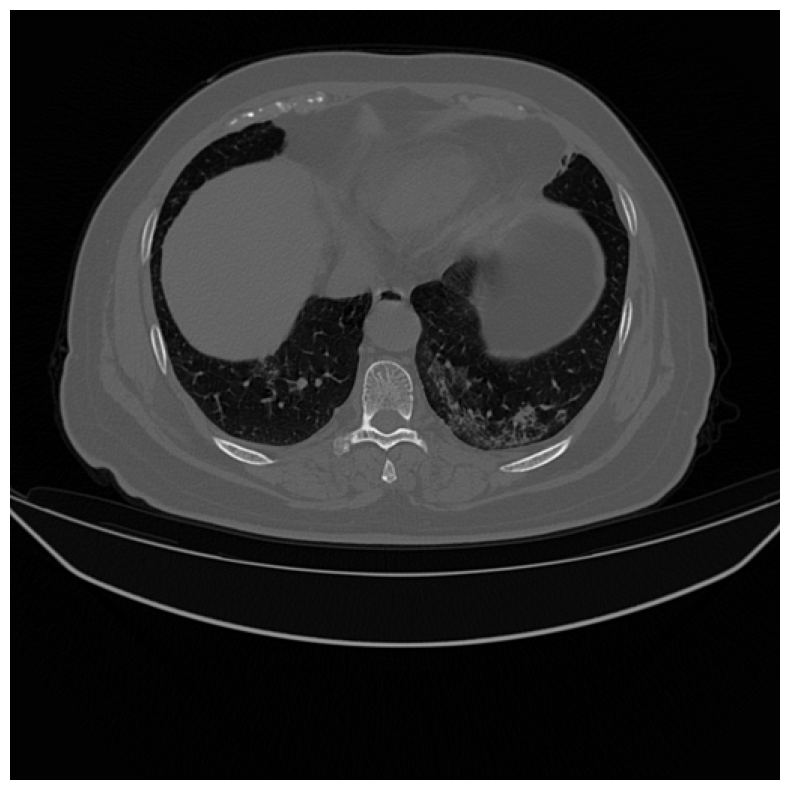

In [8]:
figure = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.style.use('grayscale')
plt.imshow(np.fliplr(np.rot90(image_slice, k=3)), origin='lower')
for contour in masks.contours:
    plt.plot(contour[:, 0], contour[:, 1], color='green')

In [31]:
print(masks.contours_masks[0].shape)
print(np.unique(masks.contours_masks[0]))

(512, 512)
[False  True]


[[273.5, 405.5, 216.5, 432.5], [97.5, 244.5, 218.5, 443.5]]


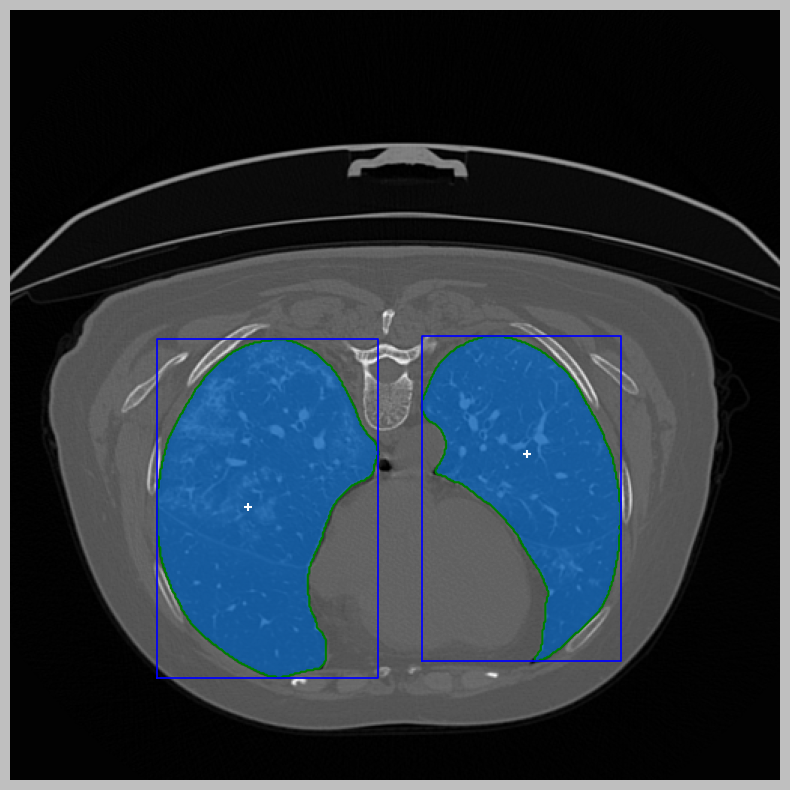

In [32]:
figure = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.style.use('grayscale')
plt.imshow(np.fliplr(np.rot90(image_slice, k=3)))
for contour in masks.contours:
    plt.plot(contour[:, 0], contour[:, 1], color='green')
for contour_mask in masks.contours_masks:
    show_mask(contour_mask, plt.gca())
masks_contours_centers_labels = np.full(len(masks.contours_centers), 1).astype(np.int8)
for masks_contour_center in masks.contours_centers:
    plt.scatter(masks_contour_center[1], masks_contour_center[0], c='white', marker='+')
print(masks.contours_bounding_boxes)
for contours_bounding_box in masks.contours_bounding_boxes:
    xs = [contours_bounding_box[0],
          contours_bounding_box[1],
          contours_bounding_box[1],
          contours_bounding_box[0],
          contours_bounding_box[0]]
    ys = [contours_bounding_box[3],
          contours_bounding_box[3],
          contours_bounding_box[2],
          contours_bounding_box[2],
          contours_bounding_box[3]]
    plt.plot(xs, ys, color='blue', linewidth=1.25)